# Regression discontinuity design

In this project, our focus is to identify if some discontinuity exists in any of the variables that abruptly changes the discount, this is called a running variable `R`. Treat `T`, for RDD work, is a discontinuous function of an observed running variable `R` such that

$$
T_i = 1R_i > c
$$

In other words, this is saying that treatment is zero when the running variable is below a threshold `c`and is one otherwise.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [179]:
df = pd.read_csv("rdd_data.csv", sep=',')
df.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [180]:
df.dtypes

# We find that like the last project, discount has the $ sign in front of it which makes it an object dtype and the customer state is an object which makes sense. Rest all dtypes make sense. Let's switch the discount to numeric like the last project.

spend_1m_baby           int64
spend_2m_baby           int64
spend_3m_baby           int64
spend_4m_baby           int64
spend_5m_baby           int64
spend_6m_baby         float64
spend_1m_clothes        int64
spend_2m_clothes      float64
spend_3m_clothes      float64
spend_4m_clothes      float64
spend_5m_clothes      float64
spend_6m_clothes      float64
spend_1m_health         int64
spend_2m_health         int64
spend_3m_health         int64
spend_4m_health         int64
spend_5m_health         int64
spend_6m_health         int64
spend_1m_pet            int64
spend_2m_pet            int64
spend_3m_pet            int64
spend_4m_pet            int64
spend_5m_pet            int64
spend_6m_pet            int64
spend_1m_groceries      int64
spend_2m_groceries      int64
spend_3m_groceries    float64
spend_4m_groceries    float64
spend_5m_groceries    float64
spend_6m_groceries    float64
spend_1m_eletronic      int64
spend_2m_eletronic      int64
spend_3m_eletronic      int64
spend_4m_e

In [181]:
df['discount'] = pd.to_numeric(df['discount'].str.split(' ').str[-1])
df['discount']

0         4.0
1         2.0
2       224.0
3         1.0
4        13.0
        ...  
9995    252.0
9996    257.0
9997     35.0
9998    136.0
9999     74.0
Name: discount, Length: 10000, dtype: float64

# Step 1: Find our running variable

Let's go find our running variable. Starting with age and tenure.

<Axes: xlabel='age', ylabel='discount'>

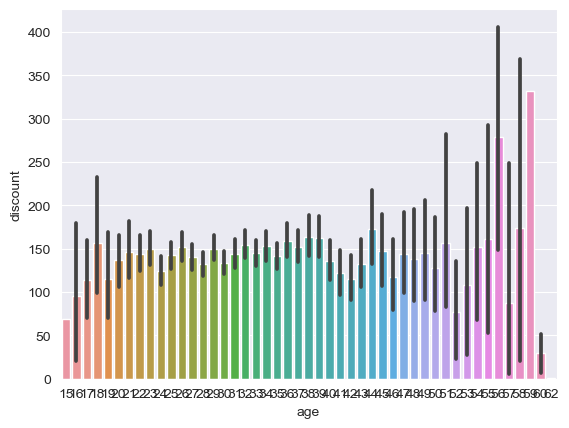

In [182]:
sns.barplot(data=df, x='age', y='discount')

<Axes: xlabel='age', ylabel='discount'>

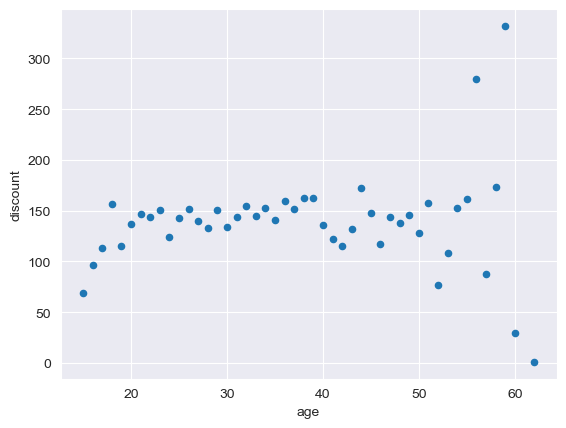

In [183]:
running_var = 'age'

group_rdd = df.groupby(running_var).agg({'discount':'mean'}).reset_index()

group_rdd.plot.scatter(x=running_var, y='discount')


<Axes: xlabel='tenure', ylabel='discount'>

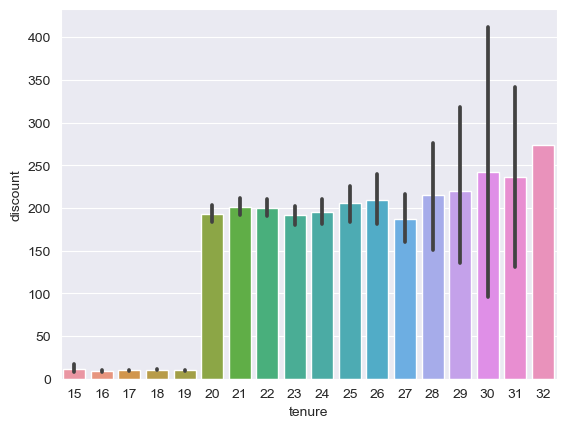

In [184]:
sns.barplot(data=df, x='tenure', y='discount')

<Axes: xlabel='tenure', ylabel='discount'>

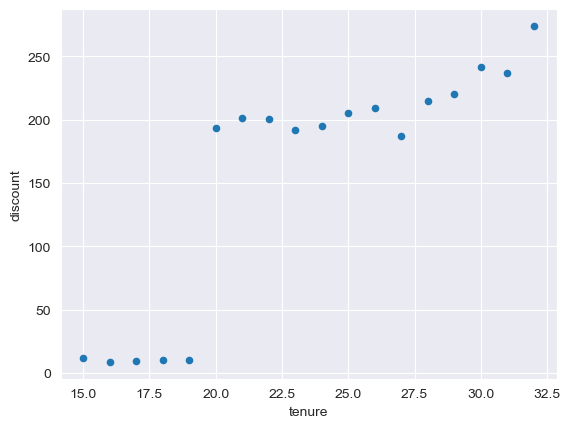

In [185]:
running_var = 'tenure'

group_rdd = df.groupby(running_var).agg({'discount':'mean'}).reset_index()

group_rdd.plot.scatter(x=running_var, y='discount')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='spend_4m_clothes', ylabel='discount'>

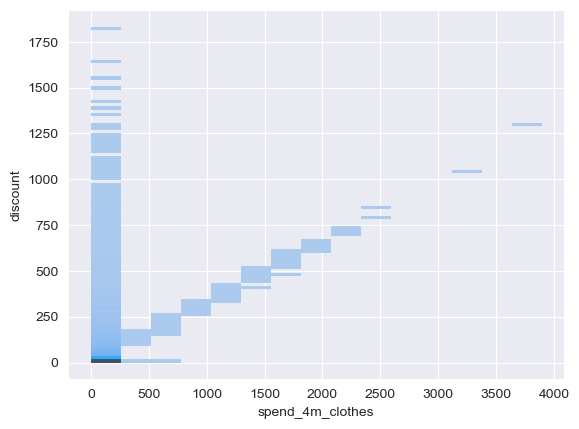

In [186]:
sns.histplot(data=df, x='spend_4m_clothes', y='discount', stat='density', bins='auto')

<Axes: xlabel='spend_4m_clothes', ylabel='discount'>

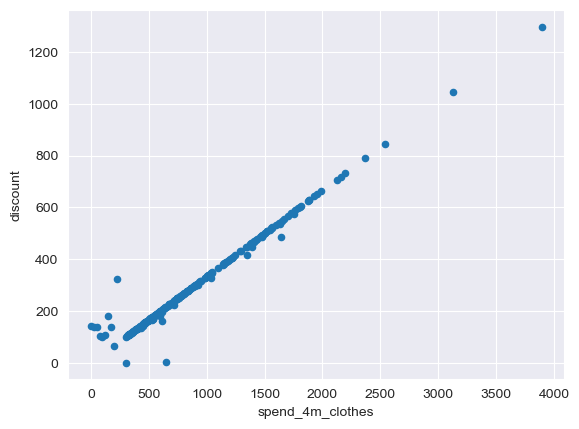

In [187]:
running_var = 'spend_4m_clothes'

group_rdd = df.groupby(running_var).agg({'discount':'mean'}).reset_index()

group_rdd.plot.scatter(x=running_var, y='discount')

Based on exploring the relationship between `spend_4m_clothes` and `discount` in the last project, thought it might be a good idea to check for any discontinuities here.

Without a doubt, there is a huge discontinuity in discounts by tenure. We find out after talking to the e-commerce company that they give this discount bonus once the customer hits a tenure of 20 months. This is our discontinuity threshold. Let us see if this discontinuity in discount translate to a discontinuity in sales.

<Axes: xlabel='tenure', ylabel='sales'>

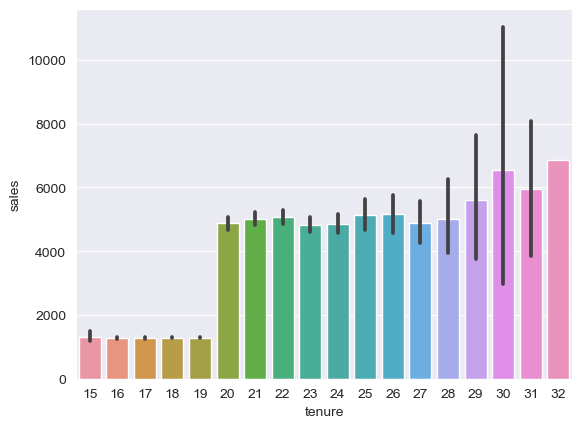

In [188]:
sns.barplot(data=df, x='tenure', y='sales')

<Axes: xlabel='tenure', ylabel='profit'>

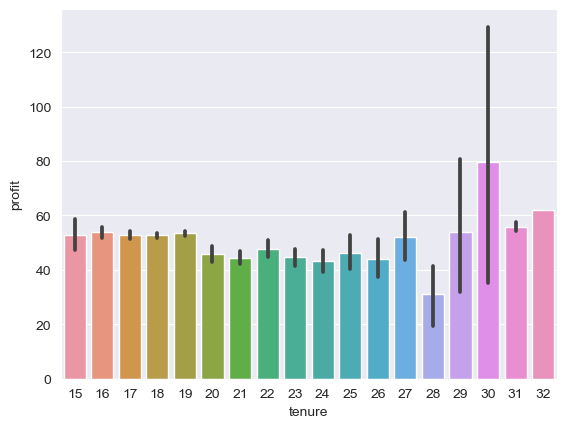

In [189]:
sns.barplot(data=df, x='tenure', y='profit')

So the discontinuity in discount is also observed in sales, however, if we look at profits, the relationship starts to have a decline post the 20 month mark, except for really tenured customers are anomalies in high sales and profit.

We can only leverage discontinuities if the customers at the right of the threshold are comparable to the ones to the left. In other words, we need customers to be roughly equal, while only discount increases as we cross the 20-month tenure threshold.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

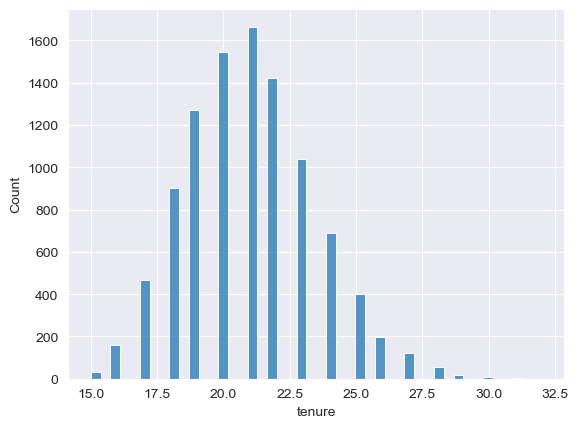

In [190]:
sns.histplot(data=df, x='tenure', stat='count', bins='auto')

The fairly normal distribution peaking right after we cross the 20-month mark is a good sign to be able to use discontinuities as a natural experiment. There is no evidence of bunching, which is expected, as the customers can't manipulate their tenure. This is considered the McCrary test for bunching.

# Step 2: Regression discontinuity design

Looking at the impact of crossing thresholds on discount first, then profit.



In [191]:
rdd_centered = df.copy()

In [192]:
rdd_centered['tenure'] = df['tenure'] - 19
rdd_centered['above_threshold'] = np.where(df['tenure'] > 19, 1, 0)

In [193]:
model = smf.ols('discount ~ tenure*above_threshold', data=rdd_centered).fit()

In [194]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     857.2
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:09:30   Log-Likelihood:                -65365.
No. Observations:               10000   AIC:                         1.307e+05
Df Residuals:                    9996   BIC:                         1.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0302      4.213      2.381      0.017       1.771      18.290
tenure                     0.1118      3.263      0.034      0.973      -6.285       6.508
above_threshold          184.7626      5.696     32.436      0.000     173.597     195.928
tenure:above_threshold     0.8269      3.430      0.241      0.809      -5.896       7.550
==============================================================================
Omnibus:                     5105.557   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42883.878
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      12.035   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting a linear regression interacting tenure with the threshold dummy 

$$
discount_i = \beta_0 + beta_1 tenure_i + \beta_2 \mathcal{1}_{tenure>19} + \beta_3 mathcal{1}_{tenure>19} * threshold_i
$$

is equivalent to fitting two regression models, one above and another below the threshold.

`beta_0` is the intercept for the model below the threshold. `\beta_0 + \beta_2` is the intercept for the model above the threshold. Hence, `\beta_2` is the jump we have from crossing the threshold. This is exactly the treatment effect we are looking for.

This means that crossing the 20th month threshold increases discount by about `184` (95% CI between `173` and `195`). This is a statistically significant difference. 

In [195]:
rdd_centered_agg = rdd_centered.groupby('tenure').agg({
    'discount': 'mean',
    'above_threshold': 'mean',
    'profit': 'mean'
}).reset_index()

rdd_centered_agg

,tenure,discount,above_threshold,profit
0,-4,11.606061,0.0,52.723939
1,-3,8.721519,0.0,53.821772
2,-2,9.633262,0.0,52.782111
3,-1,10.313053,0.0,52.680398
4,0,9.882168,0.0,53.393001
5,1,193.134067,1.0,45.844495
6,2,201.152553,1.0,44.487213
7,3,200.239635,1.0,47.701012
8,4,191.514947,1.0,44.601138
9,5,194.991266,1.0,43.279330


In [196]:
rdd_centered_agg['discount_pred'] = model.predict(rdd_centered_agg)

In [197]:
rdd_centered_agg

,tenure,discount,above_threshold,profit,discount_pred
0,-4,11.606061,0.0,52.723939,9.582855
1,-3,8.721519,0.0,53.821772,9.694702
2,-2,9.633262,0.0,52.782111,9.806550
3,-1,10.313053,0.0,52.680398,9.918397
4,0,9.882168,0.0,53.393001,10.030244
5,1,193.134067,1.0,45.844495,195.731588
6,2,201.152553,1.0,44.487213,196.670351
7,3,200.239635,1.0,47.701012,197.609115
8,4,191.514947,1.0,44.601138,198.547879
9,5,194.991266,1.0,43.279330,199.486642


<Axes: xlabel='tenure', ylabel='discount'>

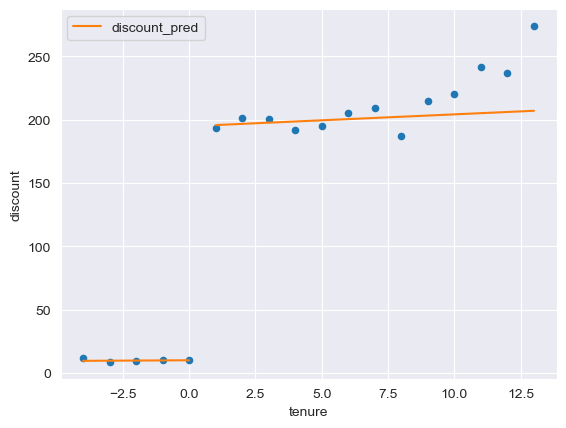

In [198]:
ax = rdd_centered_agg.plot.scatter(x="tenure", y="discount", color="C0")
rdd_centered_agg.query("above_threshold>0").plot(x="tenure", y="discount_pred", ax=ax, color="C1")
rdd_centered_agg.query("above_threshold<=0").plot(x="tenure", y="discount_pred", ax=ax, color="C1", legend=False)

### Fitting profits on tenure including the thresholds.

In [199]:
model = smf.ols('profit ~ tenure*above_threshold', data=rdd_centered).fit()

In [200]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           4.90e-11
Time:                        00:09:30   Log-Likelihood:                -52868.
No. Observations:               10000   AIC:                         1.057e+05
Df Residuals:                    9996   BIC:                         1.058e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.1927      1.208     44.046      0.000      50.825      55.560
tenure                     0.1294      0.935      0.138      0.890      -1.704       1.963
above_threshold           -7.6015      1.633     -4.656      0.000     -10.802      -4.401
tenure:above_threshold    -0.1608      0.983     -0.164      0.870      -2.088       1.766
==============================================================================
Omnibus:                     7588.126   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764441.215
Skew:                           2.930   Prob(JB):                         0.00
Kurtosis:                      45.430   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Crossing the 20th month threshold decreases the profit by `7.6`. In other words the impact of discounts on profits is negative. The company is losing money giving discounts. This is a statistically significant difference. Since crossing the threshold increases the discount by 184 and decreases profit by 7.6 we should expect each per dollar spend in discount to decrease profit by about 5 cents.

In [201]:
rdd_centered_agg['profit_pred'] = model.predict(rdd_centered_agg)

In [202]:
rdd_centered_agg

,tenure,discount,above_threshold,profit,discount_pred,profit_pred
0,-4,11.606061,0.0,52.723939,9.582855,52.675241
1,-3,8.721519,0.0,53.821772,9.694702,52.804595
2,-2,9.633262,0.0,52.782111,9.806550,52.933949
3,-1,10.313053,0.0,52.680398,9.918397,53.063303
4,0,9.882168,0.0,53.393001,10.030244,53.192657
5,1,193.134067,1.0,45.844495,195.731588,45.559711
6,2,201.152553,1.0,44.487213,196.670351,45.528291
7,3,200.239635,1.0,47.701012,197.609115,45.496872
8,4,191.514947,1.0,44.601138,198.547879,45.465452
9,5,194.991266,1.0,43.279330,199.486642,45.434032


<Axes: xlabel='tenure', ylabel='profit'>

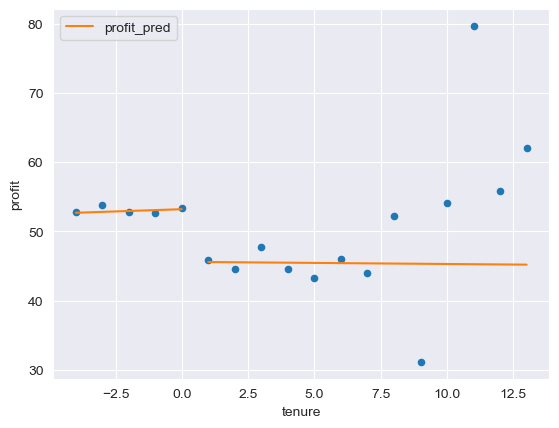

In [203]:
ax = rdd_centered_agg.plot.scatter(x="tenure", y="profit", color="C0")
rdd_centered_agg.query("above_threshold>0").plot(x="tenure", y="profit_pred", ax=ax, color="C1")
rdd_centered_agg.query("above_threshold<=0").plot(x="tenure", y="profit_pred", ax=ax, color="C1", legend=False)

The treatment effect of discount on profits is negative. 

# Step 3: Kernels to help extrapolation

We will use a kernel to better fit the discontinuity.

There are multiple ways to solve the discontinuity such as fitting a polynomial regression. A simple method, which we will use here, is using a kernel to weigh down the samples that are far from the threshold. Kernel weighting works like a lens, focusing the power of the regression on the points that are close to the threshold and discarding the ones that are far. The result is that we fit the threshold much more nicely, which in turn gives us a better estimator of the treatment effect. 

We start by defining a triangular kernel function:

$$
K(R,c,h) = 1{(|R-c|<=h)}*(1-(|R-c|/h))
$$

The function should take as input an array with the running variable `R`, a center parameter `c`, and a width parameter `h`.

In [204]:
def kernel(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float) * (1.0 - (np.abs(R-c))/h)
    return indicator

kernel(np.array([1, 2, 3, 4, 5]), c=3, h=2) #test the function

array([0. , 0.5, 1. , 0.5, 0. ])

In [205]:
# Let's apply this kernel to centered tenure

rdd_centered['tenure_kernel'] = kernel(rdd_centered['tenure'], c=0, h=5)

rdd_centered['tenure_kernel']

0       1.0
1       0.8
2       0.6
3       0.8
4       1.0
       ... 
9995    0.2
9996    0.6
9997    0.4
9998    0.6
9999    0.8
Name: tenure_kernel, Length: 10000, dtype: float64

<Axes: xlabel='tenure', ylabel='tenure_kernel'>

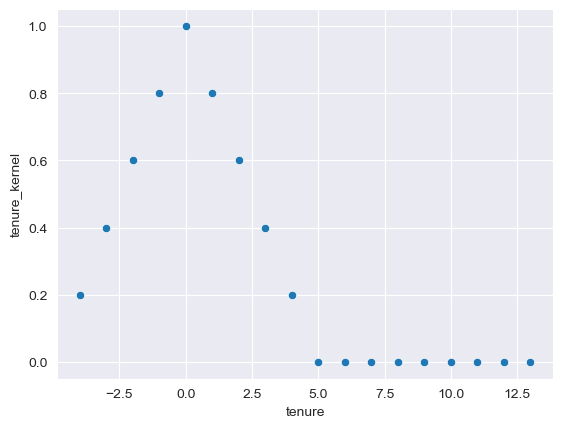

In [206]:
sns.scatterplot(y="tenure_kernel", x="tenure", data=rdd_centered)

# This puts highest weight to tenure 0 months and 0 weight for 3 months away from the center.

In [207]:
# Let us see how we can use the weighted least squares (wls) to pass weights equal to the triangular kernel applied to the tenure in the regression we ran earlier. 

model = smf.wls('profit ~ tenure*above_threshold', weights=rdd_centered['tenure_kernel'], data=rdd_centered).fit()

In [208]:
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.007
Model:                            WLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     24.78
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           5.77e-16
Time:                        00:09:31   Log-Likelihood:                   -inf
No. Observations:               10000   AIC:                               inf
Df Residuals:                    9996   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.2616      0.824     64.614      0.000      51.646      54.877
tenure                     0.2370      0.795      0.298      0.766      -1.321       1.796
above_threshold           -7.9648      1.548     -5.146      0.000     -10.999      -4.931
tenure:above_threshold    -0.0478      1.005     -0.048      0.962      -2.018       1.922
==============================================================================
Omnibus:                     8078.737   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938469.948
Skew:                           3.207   Prob(JB):                         0.00
Kurtosis:                      50.023   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
rdd_centered_agg['profit_kernel_pred'] = model.predict(rdd_centered_agg)

In [210]:
rdd_centered_agg

,tenure,discount,above_threshold,profit,discount_pred,profit_pred,profit_kernel_pred
0,-4,11.606061,0.0,52.723939,9.582855,52.675241,52.313381
1,-3,8.721519,0.0,53.821772,9.694702,52.804595,52.550427
2,-2,9.633262,0.0,52.782111,9.806550,52.933949,52.787473
3,-1,10.313053,0.0,52.680398,9.918397,53.063303,53.024519
4,0,9.882168,0.0,53.393001,10.030244,53.192657,53.261565
5,1,193.134067,1.0,45.844495,195.731588,45.559711,45.486015
6,2,201.152553,1.0,44.487213,196.670351,45.528291,45.675261
7,3,200.239635,1.0,47.701012,197.609115,45.496872,45.864507
8,4,191.514947,1.0,44.601138,198.547879,45.465452,46.053753
9,5,194.991266,1.0,43.279330,199.486642,45.434032,46.242999


<Axes: xlabel='tenure', ylabel='profit'>

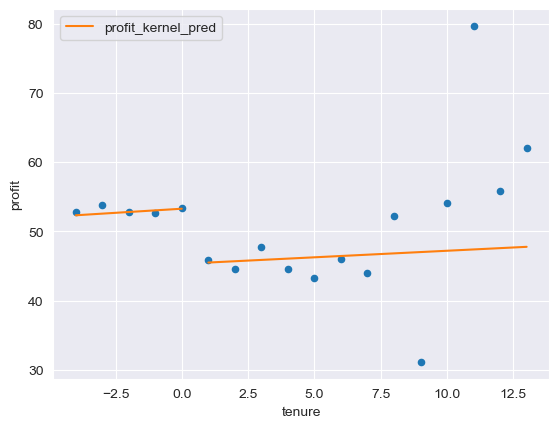

In [211]:
ax = rdd_centered_agg.plot.scatter(x="tenure", y="profit", color="C0")
rdd_centered_agg.query("above_threshold>0").plot(x="tenure", y="profit_kernel_pred", ax=ax, color="C1")
rdd_centered_agg.query("above_threshold<=0").plot(x="tenure", y="profit_kernel_pred", ax=ax, color="C1", legend=False)

In [212]:
model = smf.wls('discount ~ tenure*above_threshold', weights=rdd_centered['tenure_kernel'], data=rdd_centered).fit()
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.285
Model:                            WLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1328.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:09:32   Log-Likelihood:                   -inf
No. Observations:               10000   AIC:                               inf
Df Residuals:                    9996   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0070      2.824      3.543      0.000       4.471      15.543
tenure                     0.0755      2.724      0.028      0.978      -5.264       5.415
above_threshold          183.8284      5.303     34.666      0.000     173.434     194.223
tenure:above_threshold     1.5895      3.443      0.462      0.644      -5.160       8.339
==============================================================================
Omnibus:                     6191.651   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94912.531
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      17.077   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
rdd_centered_agg['discount_kernel_pred'] = model.predict(rdd_centered_agg)
rdd_centered_agg

,tenure,discount,above_threshold,profit,discount_pred,profit_pred,profit_kernel_pred,discount_kernel_pred
0,-4,11.606061,0.0,52.723939,9.582855,52.675241,52.313381,9.705003
1,-3,8.721519,0.0,53.821772,9.694702,52.804595,52.550427,9.780498
2,-2,9.633262,0.0,52.782111,9.806550,52.933949,52.787473,9.855993
3,-1,10.313053,0.0,52.680398,9.918397,53.063303,53.024519,9.931489
4,0,9.882168,0.0,53.393001,10.030244,53.192657,53.261565,10.006984
5,1,193.134067,1.0,45.844495,195.731588,45.559711,45.486015,195.500380
6,2,201.152553,1.0,44.487213,196.670351,45.528291,45.675261,197.165352
7,3,200.239635,1.0,47.701012,197.609115,45.496872,45.864507,198.830324
8,4,191.514947,1.0,44.601138,198.547879,45.465452,46.053753,200.495296
9,5,194.991266,1.0,43.279330,199.486642,45.434032,46.242999,202.160268


<Axes: xlabel='tenure', ylabel='discount'>

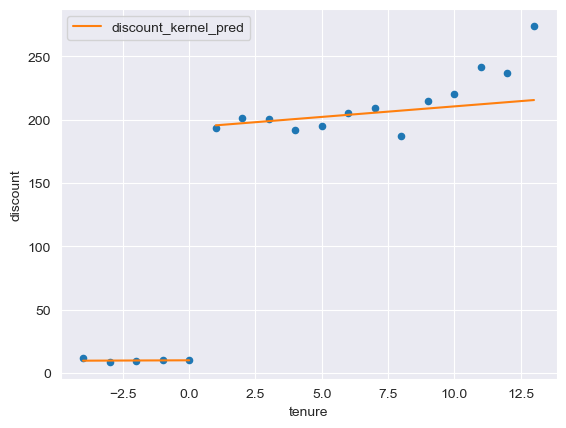

In [214]:
ax = rdd_centered_agg.plot.scatter(x="tenure", y="discount", color="C0")
rdd_centered_agg.query("above_threshold>0").plot(x="tenure", y="discount_kernel_pred", ax=ax, color="C1")
rdd_centered_agg.query("above_threshold<=0").plot(x="tenure", y="discount_kernel_pred", ax=ax, color="C1", legend=False)

With a `c=0` and `h=4` the treatment effect of discounts on profit is still negative. Crossing the 20th month threshold decreases the profit by `8.4` with a CI of decrease by `11.4` and `5.1`. This is a statistically significant difference. Crossing the threshold increases the discount by `179` and decreases profit by `8.4`.

We also observe that regression line for after crossing the threshold in the profit and discount regression plots suggest a positive relationship in the treatment effect.

Now let's plug and play with different values for `c` and `h` and see how that changes the results.

When we reduce `h=0` then all predictions suffer and come down to zero. This is not what we want. If we increase to `h=10` then we get a result close to what we get without weighting. 

`h=3` moves the prediction line further away from the data points on the scatter plot for profit anf discount. Similar for `h=2`

